In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
oilData = pd.read_csv("data/US-Crude Oil Production Weekly.csv")

In [3]:
oilData.head()

,Date,Weekly U.S. Field Production of Crude Oil (Thousand Barrels per Day)
0,"Jan 07, 1983",8634.0
1,"Jan 14, 1983",8634.0
2,"Jan 21, 1983",8634.0
3,"Jan 28, 1983",8634.0
4,"Feb 04, 1983",8660.0


In [4]:
oilData.rename(columns={"Date": "date", "Weekly U.S. Field Production of Crude Oil  (Thousand Barrels per Day)": "weekly_production"}, inplace=True)
oilData.columns

Index(['date', 'weekly_production'], dtype='object')

In [5]:
oilData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 2 columns):
date                 1993 non-null object
weekly_production    1993 non-null float64
dtypes: float64(1), object(1)
memory usage: 31.3+ KB


In [6]:
oilData.isna().sum()

date                 1
weekly_production    1
dtype: int64

In [7]:
# Since ther weekly production has none value, lets explore it
oilData[oilData["weekly_production"].isna()].index

Int64Index([1993], dtype='int64')

In [8]:
# From observation its is found that last values is None, so remove them
oilData.dropna(inplace=True)

In [9]:
oilData["date"] = pd.to_datetime(oilData["date"], errors='coerce')
oilData.head(2)

,date,weekly_production
0,1983-01-07,8634.0
1,1983-01-14,8634.0


In [10]:
def get_month(date):
    return (date.strftime('%b'))

def get_year(date):
    return (date.strftime('%Y'))

oilData["month"] = oilData["date"].apply(get_month)
oilData["year"] = oilData["date"].apply(get_year)

oilData2020 = oilData[oilData["year"]!='2021']
oilData2020["month_idx"] = pd.DatetimeIndex(pd.to_datetime(oilData2020['month'], format='%b')).month
oilData2020.head(10)

/Users/anuragcp/opt/anaconda3/envs/learn/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,date,weekly_production,month,year,month_idx
0,1983-01-07,8634.0,Jan,1983,1
1,1983-01-14,8634.0,Jan,1983,1
2,1983-01-21,8634.0,Jan,1983,1
3,1983-01-28,8634.0,Jan,1983,1
4,1983-02-04,8660.0,Feb,1983,2
5,1983-02-11,8660.0,Feb,1983,2
6,1983-02-18,8660.0,Feb,1983,2
7,1983-02-25,8660.0,Feb,1983,2
8,1983-03-04,8677.0,Mar,1983,3
9,1983-03-11,8677.0,Mar,1983,3


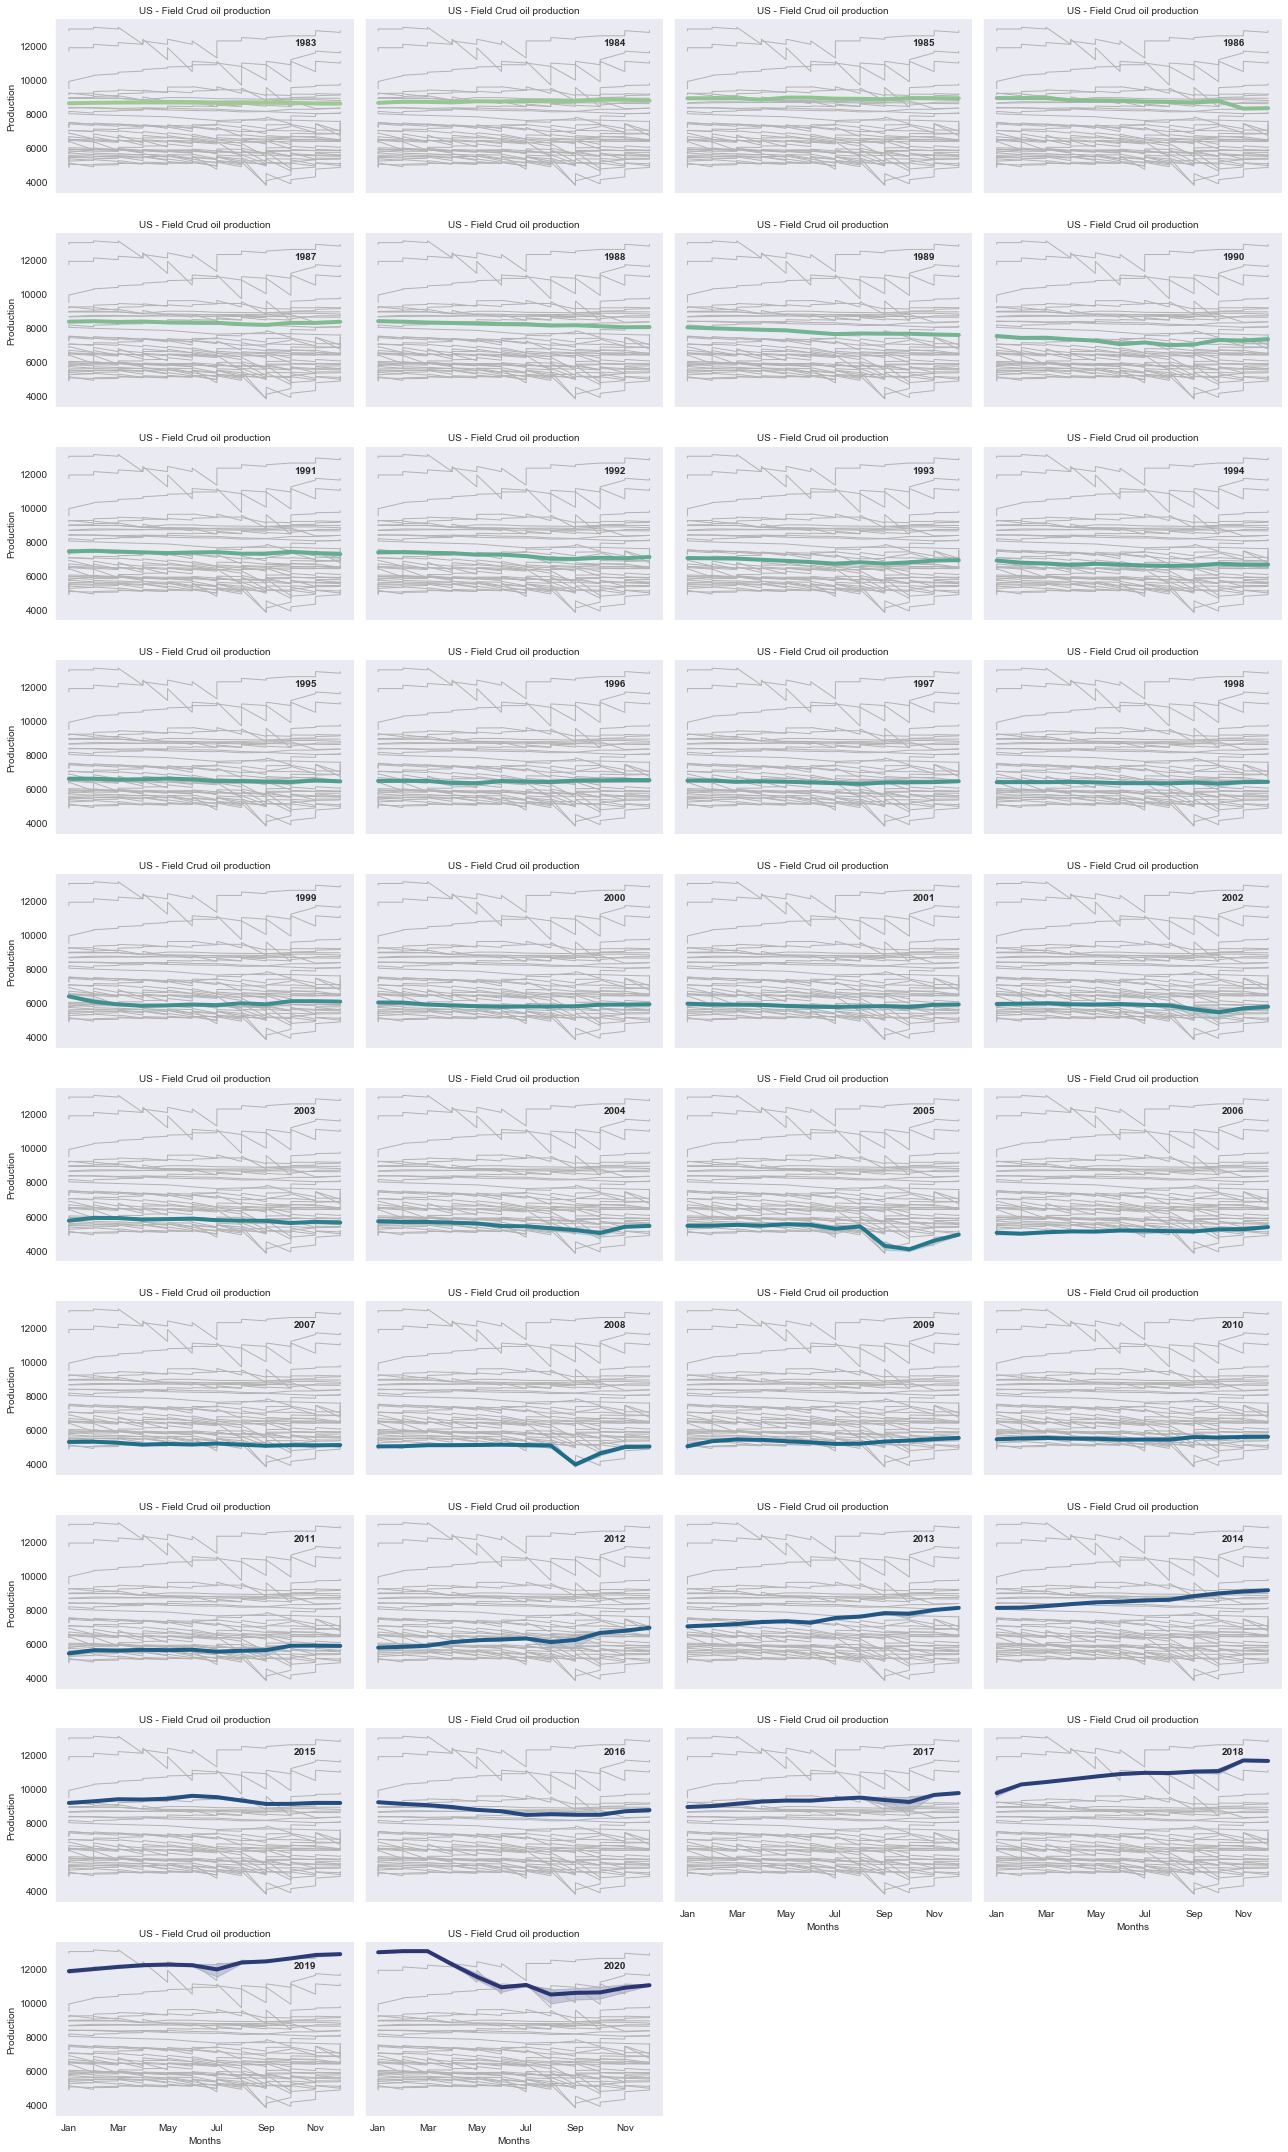

In [44]:
# Plot each year's time series in its own facet
sns.set_style("dark")
g = sns.relplot(
    data=oilData2020, 
    x="month", y="weekly_production", col="year", hue="year",
    kind="line", palette="crest", linewidth = 4, zorder=5, col_wrap=4,
    height=3, aspect=1.5, legend=False
)

# Iterate over each subplot to customize further
for year, ax in g.axes_dict.items():

    # Add the title as an annotation within the plot
    ax.text(.8, .85, year, transform=ax.transAxes, fontweight="bold")

    # Plot every year's time series in the background
    sns.lineplot(
        data=oilData2020, x="month", y="weekly_production", units="year",
        estimator=None, color=".7", linewidth=1, ax=ax,
    )

# Reduce the frequency of the x axis ticks
ax.set_xticks(ax.get_xticks()[::2])

# Tweak the supporting aspects of the plot
g.set_titles("US - Field Crud oil production")
g.set_axis_labels("Months", "Production")
g.tight_layout()
plt.show()

In [58]:
def get_weekno(date):
    return (date.strftime("%W"))
oilData2021 = oilData[oilData["year"]=='2021']
oilData2021["weekno"] = oilData2021["date"].apply(get_weekno)

/Users/anuragcp/opt/anaconda3/envs/learn/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Index(['date', 'weekly_production', 'month', 'year', 'weekno'], dtype='object')

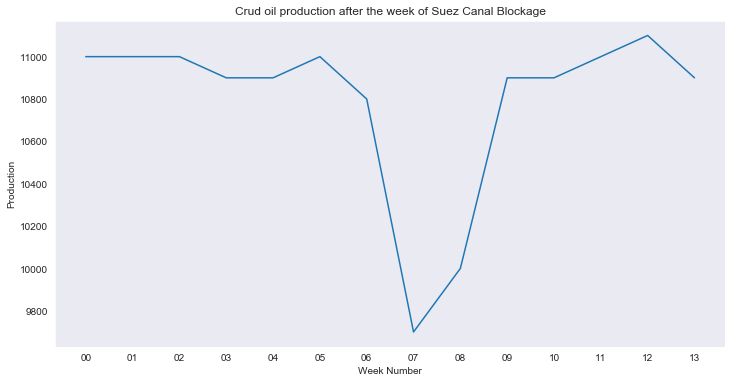

In [62]:
plt.figure(figsize=(12,6))
plt.plot(oilData2021.weekno, oilData2021.weekly_production)
plt.xlabel("Week Number")
plt.ylabel("Production")
plt.title("Crud oil production after the week of Suez Canal Blockage")
plt.show()

Index(['date', 'weekly_production', 'month', 'year', 'weekno'], dtype='object')